In [1]:
import csv
from PIL import Image #pip install Pillow
import numpy as np
from matplotlib import pyplot
from os import path
import pandas as pd

In [2]:
NUM_PEOPLE_TO_READ_IN=200

In [3]:
data = {
    "images":np.empty((NUM_PEOPLE_TO_READ_IN*4,50,50,3)),
    "X":np.empty((NUM_PEOPLE_TO_READ_IN*4,50*50*3)),
    "Y":np.empty((NUM_PEOPLE_TO_READ_IN*4))
}

counter = 0
with open('metadata.csv', newline='') as csvfile:
    rows = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in tuple(rows)[1:]:
        
        mask_type = int(row[1])
        filename = row[5]
        
        try:
            image = np.array(Image.open(path.join("data", filename)))
        except FileNotFoundError:
            image = np.zeros([50,50,3]) # USED FOR DISPLAYING NICELY BELOW / TODO: MAKE SURE TO FILTER THESE AT SOME POINT
            
        data["images"][counter] = image
        data["X"][counter] = np.reshape(image, 50*50*3)
        data["Y"][counter] = mask_type
        
        counter += 1
        if(counter >= NUM_PEOPLE_TO_READ_IN*4):
            break
            
    data["images"] = data["images"].astype(int)
    data["X"] = data["X"].astype(int)
    data["Y"] = data["Y"].astype(int)

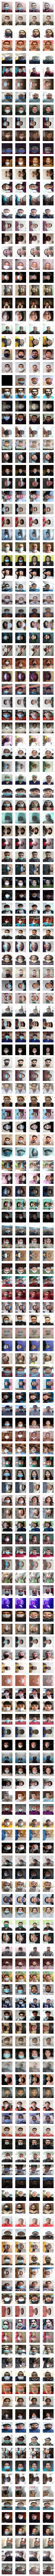

In [4]:
pyplot.figure(figsize=(4, NUM_PEOPLE_TO_READ_IN))
counter = 0
for img in data["images"]:
    pyplot.subplot(NUM_PEOPLE_TO_READ_IN, 4, counter+1)
    pyplot.axis("off")
    pyplot.imshow(img)
    counter += 1

In [5]:
print(data["images"].shape)
print(data["X"].shape)
print(data["Y"].shape)

(800, 50, 50, 3)
(800, 7500)
(800,)


In [6]:
pd.DataFrame(data["X"])

0     1     2     3     4     5     6     7     8     9     ...  7490  \
0     153   122   117   159   128   123   163   133   125   168  ...     8   
1     165   135   135   168   138   138   171   143   142   175  ...    24   
2     178   160   156   181   163   159   186   166   165   189  ...    40   
3     193   183   184   197   187   188   201   186   191   204  ...    82   
4     204   191   175   201   188   172   211   195   182   212  ...    35   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
795   160   164   173   165   169   178   157   160   167   158  ...   106   
796    98   103    96   102   107   100   102   107   100   103  ...    49   
797   115   116   108   116   117   109   119   120   112   120  ...    99   
798   169   162   156   176   169   163   175   168   162   178  ...   106   
799   108   108   100   110   110   102   113   113   105   111  ...    41   

     7491  7492  7493  7494  7495  7496  7497  7498  7499  
0     112    53    59   103    41    46    96    34    39  
1     129    59    69   136    62    75   122    48    61  
2     102    58    71   135    79    92   114    54    66  
3      95    44    59    61    20    36    78    42    56  
4      54    45    30    53    46    30    54    47    31  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
795   218   203   184   208   195   176   194   181   162  
796   109    83    82   109    77    80   119    84    88  
797    79    62    70   114    87    94   128    96   101  
798   144   117   122   138   106   111   150   115   121  
799   103    75    74    88    58    58    77    46    44  

[800 rows x 7500 columns]

In [7]:
pd.DataFrame(data["Y"], columns=np.array(["Y"]))

Y
0    1
1    2
2    3
3    4
4    1
..  ..
795  4
796  1
797  2
798  3
799  4

[800 rows x 1 columns]